# plotting of graphs

In [20]:
import numpy as np
from scipy.sparse import csr_matrix
import networkx as nx
import matplotlib.pyplot as plt


In [21]:
def read_graph(filename):
    
    file1 = open(filename, 'r')
    Lines = file1.readlines()
    file1.close()

    node_edge = Lines[0]
    node_edge = node_edge.split()
    node_edge = [int(i) for i in node_edge]
    
    row_ptr = Lines[1]
    row_ptr = row_ptr.split()
    row_ptr = [int(i) for i in row_ptr]
    
    col_off = Lines[2]
    col_off = col_off.split()
    col_off = [int(i) for i in col_off]
    
    values = Lines[3]
    values = values.split()
    values = [float(i) for i in values]
    
    b = Lines[4]
    b = b.split()
    b = [int(i) for i in b]
    
    
    return node_edge, row_ptr, col_off, values, b

In [22]:
filename = "data/01/ER_0.01_16000.txt"
node_edge, row_ptr, col_off, values, b = read_graph(filename)
dimension = len(row_ptr)-1
sink_index = [i for i in range(0, len(b)) if b[i] < 0]
assert(len(sink_index)==1) #to make sure only one elecemt is negative 
sink_index = sink_index[0]
sink_index

15999

In [23]:
# node_edge = np.array(node_edge)
row_ptr = np.array(row_ptr)
col_off = np.array(col_off)
values = np.array(values)


A = csr_matrix((values, col_off, row_ptr), shape= (len(row_ptr)-1, len(row_ptr)-1)).toarray()
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Drawing options
draw_networkx(G[, pos, arrows, with_labels]) : Draw the graph G using Matplotlib.

draw_networkx_nodes(G, pos[, nodelist, ...]) : Draw the nodes of the graph G. 

draw_networkx_edges(G, pos[, edgelist, ...]) : Draw the edges of the graph G.

draw_networkx_labels(G, pos[, labels, ...]) : Draw node labels on the graph G.

draw_networkx_edge_labels(G, pos[, ...]) : Draw edge labels.

draw_circular(G, \**kwargs) : Draw the graph G with a circular layout.

draw_kamada_kawai(G, \**kwargs) : Draw the graph G with a Kamada-Kawai force-directed layout.

draw_planar(G, \**kwargs) : Draw a planar networkx graph G with planar layout.

draw_random(G, \**kwargs) : Draw the graph G with a random layout.

draw_spectral(G, \**kwargs) : Draw the graph G with a spectral 2D layout.

draw_spring(G, \**kwargs) : Draw the graph G with a spring layout.

draw_shell(G[, nlist]) : Draw networkx graph G with shell layout.

In [24]:
G = nx.from_numpy_array(A, parallel_edges=False, create_using=None)

In [19]:
#alternate draw is available in next line
nx.draw_networkx(G) # plot chnages after each iter
#see draw_networkx_labels later
# plt.show()

KeyboardInterrupt: 

# Study of Degree Analysis

## Degree rank Plot
#### plot of non increasing degrees of nodes
## Degree distribution
#### how many nodes(y axis) are certain degree (x axis)

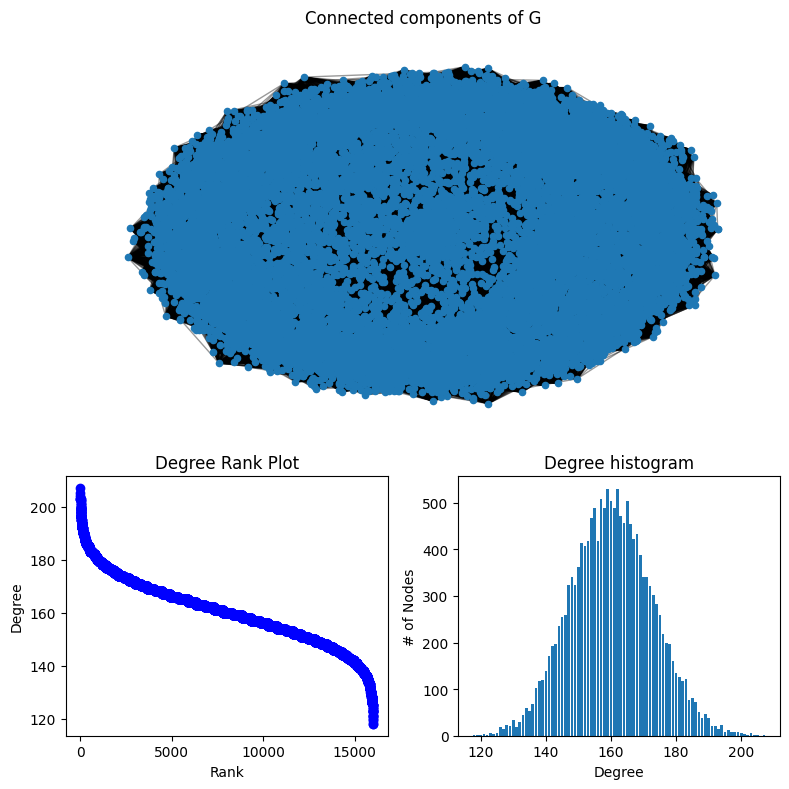

In [25]:



degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

# visualization of rate $\beta^*$ for complete, cycle, star graph


In [1]:
import matplotlib.pyplot as plt

In [2]:
def make_line_plot(x, y):
    plt.plot(x,y)
    

    plt.xlabel("Nodes")
    plt.ylabel("beta*")
#     plt.legend()
#     plt.title(plot_title, fontsize = 5)
    # plt.savefig(path_to_save+filename+"_"+x_title+"_"+y_title+".eps",format='eps')
#     plt.savefig(path_to_save+filename+"_"+x_title+"_"+y_title+".png", dpi=400)
#     plt.close() 


### Plotting optimal beta for cycle, star and complete

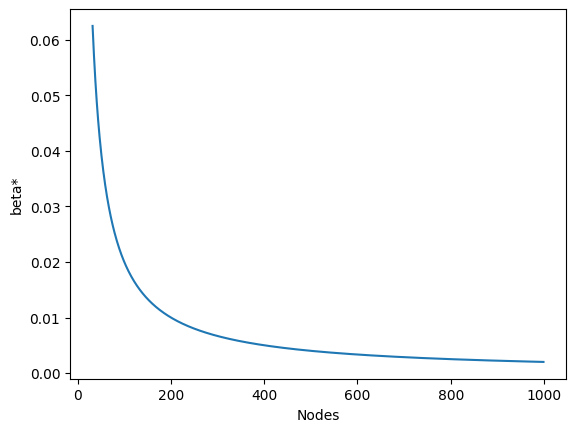

In [4]:

no_of_nodes = list(range(32,1000))
no_of_nodes;
beta_complete = [i/(2*(i-1)) for i in no_of_nodes]
beta_cycle = [2/i for i in no_of_nodes]
beta_star_leaf_leaf = [1/(i-1) for i in no_of_nodes]
make_line_plot(no_of_nodes, beta_cycle)

# Variation of values of x in i_th coordinate 

In [2]:
#copy the stat file here
# cd exec stat
# mv commnad
# !Filename=dummy
# !cp . $Filename 
# doing that manually for now

In [2]:
def find_partial_line(lines, search_string, is_reverse):
    lines=lines.split("\n")
    num_of_lines = len(lines) 
    result = []
    if is_reverse == False:
        my_range = range(0, num_of_lines)
    else:
        my_range = range(num_of_lines-1, -1, -1)
    # print(my_range)
    for i in my_range:
        #print(lines[i].strip()[0:len(search_string.strip())] , search_string.strip())
        if(lines[i].strip()[0:len(search_string.strip())] == search_string.strip()):
            # print("line is found at ", i)
            print(".", end="")
            result.append(i)
    return result

def find_lines(lines, search_string, is_reverse):
    lines=lines.split("\n")
    num_of_lines = len(lines) 
    result = []
    if is_reverse == False:
        my_range = range(0, num_of_lines)
    else:
        my_range = range(num_of_lines-1, -1, -1)
    # print(my_range)
    for i in my_range:
        #  print(lines[i].strip() , search_string.strip())
        if(lines[i].strip() == search_string.strip()):
            # print("line is found at ", i)
            print(".", end="")
            result.append(i)
    return result

def sample_ith_line(lines, search_string, i, result_list):
   
    indices_list = find_lines(lines, search_string, False)
    print(len(indices_list))
    lines = lines.split("\n")
    for j in indices_list:
        result_list.append(float(lines[j+i].strip().split()[-1]))
        
def sample_ith_word(lines, search_string, i, result_list):

    indices_list = find_partial_line(lines, search_string, False)
    
    lines = lines.split("\n")
    for j in indices_list:
        result_list.append(float(lines[j].strip().split()[i]))


In [3]:
text_file = open("dummy", "r")
 
#read whole file to a string
lines = text_file.read()
 


x_i_practical = []
sample_ith_line(lines, "printing x", 1, x_i_practical)

#In DRW compute iter: 0 beta: 0.031250 
beta = []
sample_ith_word(lines, "In DRW compute iter:", -1, beta)

iteration = []
sample_ith_word(lines, "In DRW compute iter:", 4, iteration)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [4]:
#calculate actual solution
n = 4
Type = "cycle"

if Type == "cycle":
    x = [ (n-(i+1))/(2*n) for i in range(0,n)]
    
if Type == "complete":
    x = [1/n for i in range(0,n)]
    x[0] = 2/n
    x.append(0)
   
if Type == "star_root":
    x = [ 1 for i in range(0,n-1)]
    x.append(0)
    
if Type == "star_leaf":
    x = [ 1 for i in range(0,n-1)]
    x[1] = 2
    x.append(0)
 
x_i_theoretical = x[0]
# x
x_i_theoretical

0.375

In [58]:

x=[1,1/2,0,1/2]
 
x_i_theoretical = x[0]
[0.25*i for i in x]


[0.25, 0.125, 0.0, 0.125]

In [5]:
# print([i for i,j,k in list(zip(beta, iteration, x_i_practical))])
def split_lists(ref_list, subject_list):
    assert len(ref_list) == len(subject_list)
    result = []
    start = -1
#     sublist = list(subject_list[0])
    for index in range(len(ref_list)):
        if ref_list[index] == start:
            sublist.append(subject_list[index])
        else:
            if index != 0:
                result.append(sublist)   
            start = ref_list[index]
            sublist = [subject_list[index]]
            
    result.append(sublist)
    return result
       
        

In [6]:
iteration_split = split_lists(beta, iteration)
x_i_practical_split = split_lists(beta, x_i_practical)
beta_values = sorted(list(set(beta)), reverse= True)

In [7]:
from random import randint

import random
def make_multiple_line_plot(beta, iteration_split,  x_i_theoretical, x_i_practical_split, filename, path_to_save, x_title, y_title, plot_title):

    for i in range(len(beta)): 
        print(i)
        color = '#{:06x}'.format(randint(0, 256**3))
#         plt.plot(list(range(0,150000)), [beta[i]*x_i_theoretical]*150000 , linestyle = "dotted", color = color)
        plt.plot(iteration_split[i], x_i_practical_split[i], label = str(beta[i]), color = color )
        
    

    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.legend()
    plt.title(plot_title, fontsize = 5)
    plt.show()
    # plt.savefig(path_to_save+filename+"_"+x_title+"_"+y_title+".eps",format='eps')
#     plt.savefig(path_to_save+filename+"_"+x_title+"_"+y_title+".png", dpi=400)
#     plt.close() 


0
1
2
3
4
5


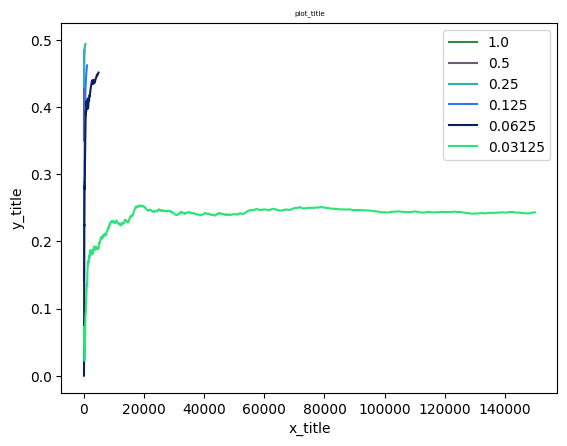

In [8]:
#be very careful about the placement of sink
make_multiple_line_plot(beta_values, iteration_split, x_i_theoretical, x_i_practical_split, "filename", "path_to_save", "x_title", "y_title", "plot_title")

In [63]:
len(x_i_practical_split)

3

In [64]:
x_i_practical_split

[[0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667,
  0.041667],
 [0.033333,
  0.03125,
  0.031944,
  0.030208,
  0.03,
  0.031944,
  0.033333,
  0.034375,
  0.035185,
  0.035833,
  0.036364,
  0.036806,
  0.037179,
  0.0375,
  0.037778,
  0.038021,
  0.038235,
  0.038426,
  0.038596,
  0.03875,
  0.038889,
  0.039015,
  0.03913,
  0.039063],
 [0.015833,
  0.019583,
  0.019722,
  0.020208,
  0.022167,
  0.022083,
  0.022143,
  0.022292,
  0.021574,
  0.020833,
  0.02053,
  0.020833,
  0.021731,
  0.021905,
  0.021778,
  0.021458,
  0.02152,
  0.02162,
  0.02136,
  0.021375,
  0.02127,
  0.021326,
  0.021014,
  0.021007,
  0.020967,
  0.020801,
  0.020833,
  0.021161,
  0.02158,
  0.021556,
  0.021774,
  0.021823,
  0.021717,
  0.021593,
  0.02181,
  0.021782,
  0.021757,
  0.02182,
  0.021816,
  0.021938,
  0.021972,
  0.021766,
  0.021802,
  0.021818,
  0.021759,
  0.02163,
  0.021578,
  0.021458,
  0.021463,
  0.021617,
  0.0216

In [54]:
# type(beta[0])

In [ ]:
# plot as a dotted line in the loop in seperate plot

In [154]:
# remove loaded file